# **Linear Regression Analysis on Process Capability Data**
This notebook provides a step-by-step approach to performing **Linear Regression** on the **process capability dataset** to analyze relationships between variables and predict key process performance metrics.

### **Objectives:**
- Identify **significant factors** affecting **PPM defect rates**
- Develop a **predictive model** for defect estimation
- Help in **process optimization** to **reduce defects** in manufacturing

## **1. Load and Explore the Data**
We start by loading the dataset and exploring its structure.

In [1]:

import pandas as pd

# Load the dataset
file_path = "process_capability_data.csv"  # Update with correct path if needed
df = pd.read_csv(file_path)

# Display basic information
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Process_Name      8 non-null      object 
 1   Sample_Mean       8 non-null      float64
 2   Sample_Size       8 non-null      int64  
 3   Std_Dev_Within    8 non-null      float64
 4   Std_Dev_Overall   8 non-null      float64
 5   Cp                8 non-null      float64
 6   Cpk               8 non-null      float64
 7   Pp                8 non-null      float64
 8   Ppk               8 non-null      float64
 9   PPM_Observed_USL  8 non-null      float64
 10  PPM_Expected_USL  8 non-null      float64
dtypes: float64(9), int64(1), object(1)
memory usage: 836.0+ bytes


,Sample_Mean,Sample_Size,Std_Dev_Within,Std_Dev_Overall,Cp,Cpk,Pp,Ppk,PPM_Observed_USL,PPM_Expected_USL
count,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,0.650287,1131.000000,0.588194,0.755683,4.06875,2.391250,3.653750,2.101250,2304.727500,41.348750
std,49.519351,5.014265,0.638162,0.879932,1.42835,0.753401,1.570386,0.769256,4241.162097,95.033089
min,-56.009000,1128.000000,0.019162,0.019596,2.21000,1.150000,1.640000,1.060000,0.000000,0.000000
25%,-40.897900,1128.000000,0.040556,0.042632,3.39000,1.775000,2.855000,1.505000,0.000000,0.000000
50%,5.844600,1129.000000,0.387775,0.446860,3.49500,2.775000,3.375000,2.145000,0.570000,0.010000
75%,46.461025,1130.500000,1.082682,1.226808,4.64750,2.952500,4.480000,2.742500,2206.155000,15.502500
max,46.528400,1142.000000,1.639030,2.338800,6.74000,3.080000,6.560000,2.990000,11383.540000,271.040000


## **2. Data Visualization**
Use scatter plots and correlation heatmaps to understand relationships between independent and dependent variables.

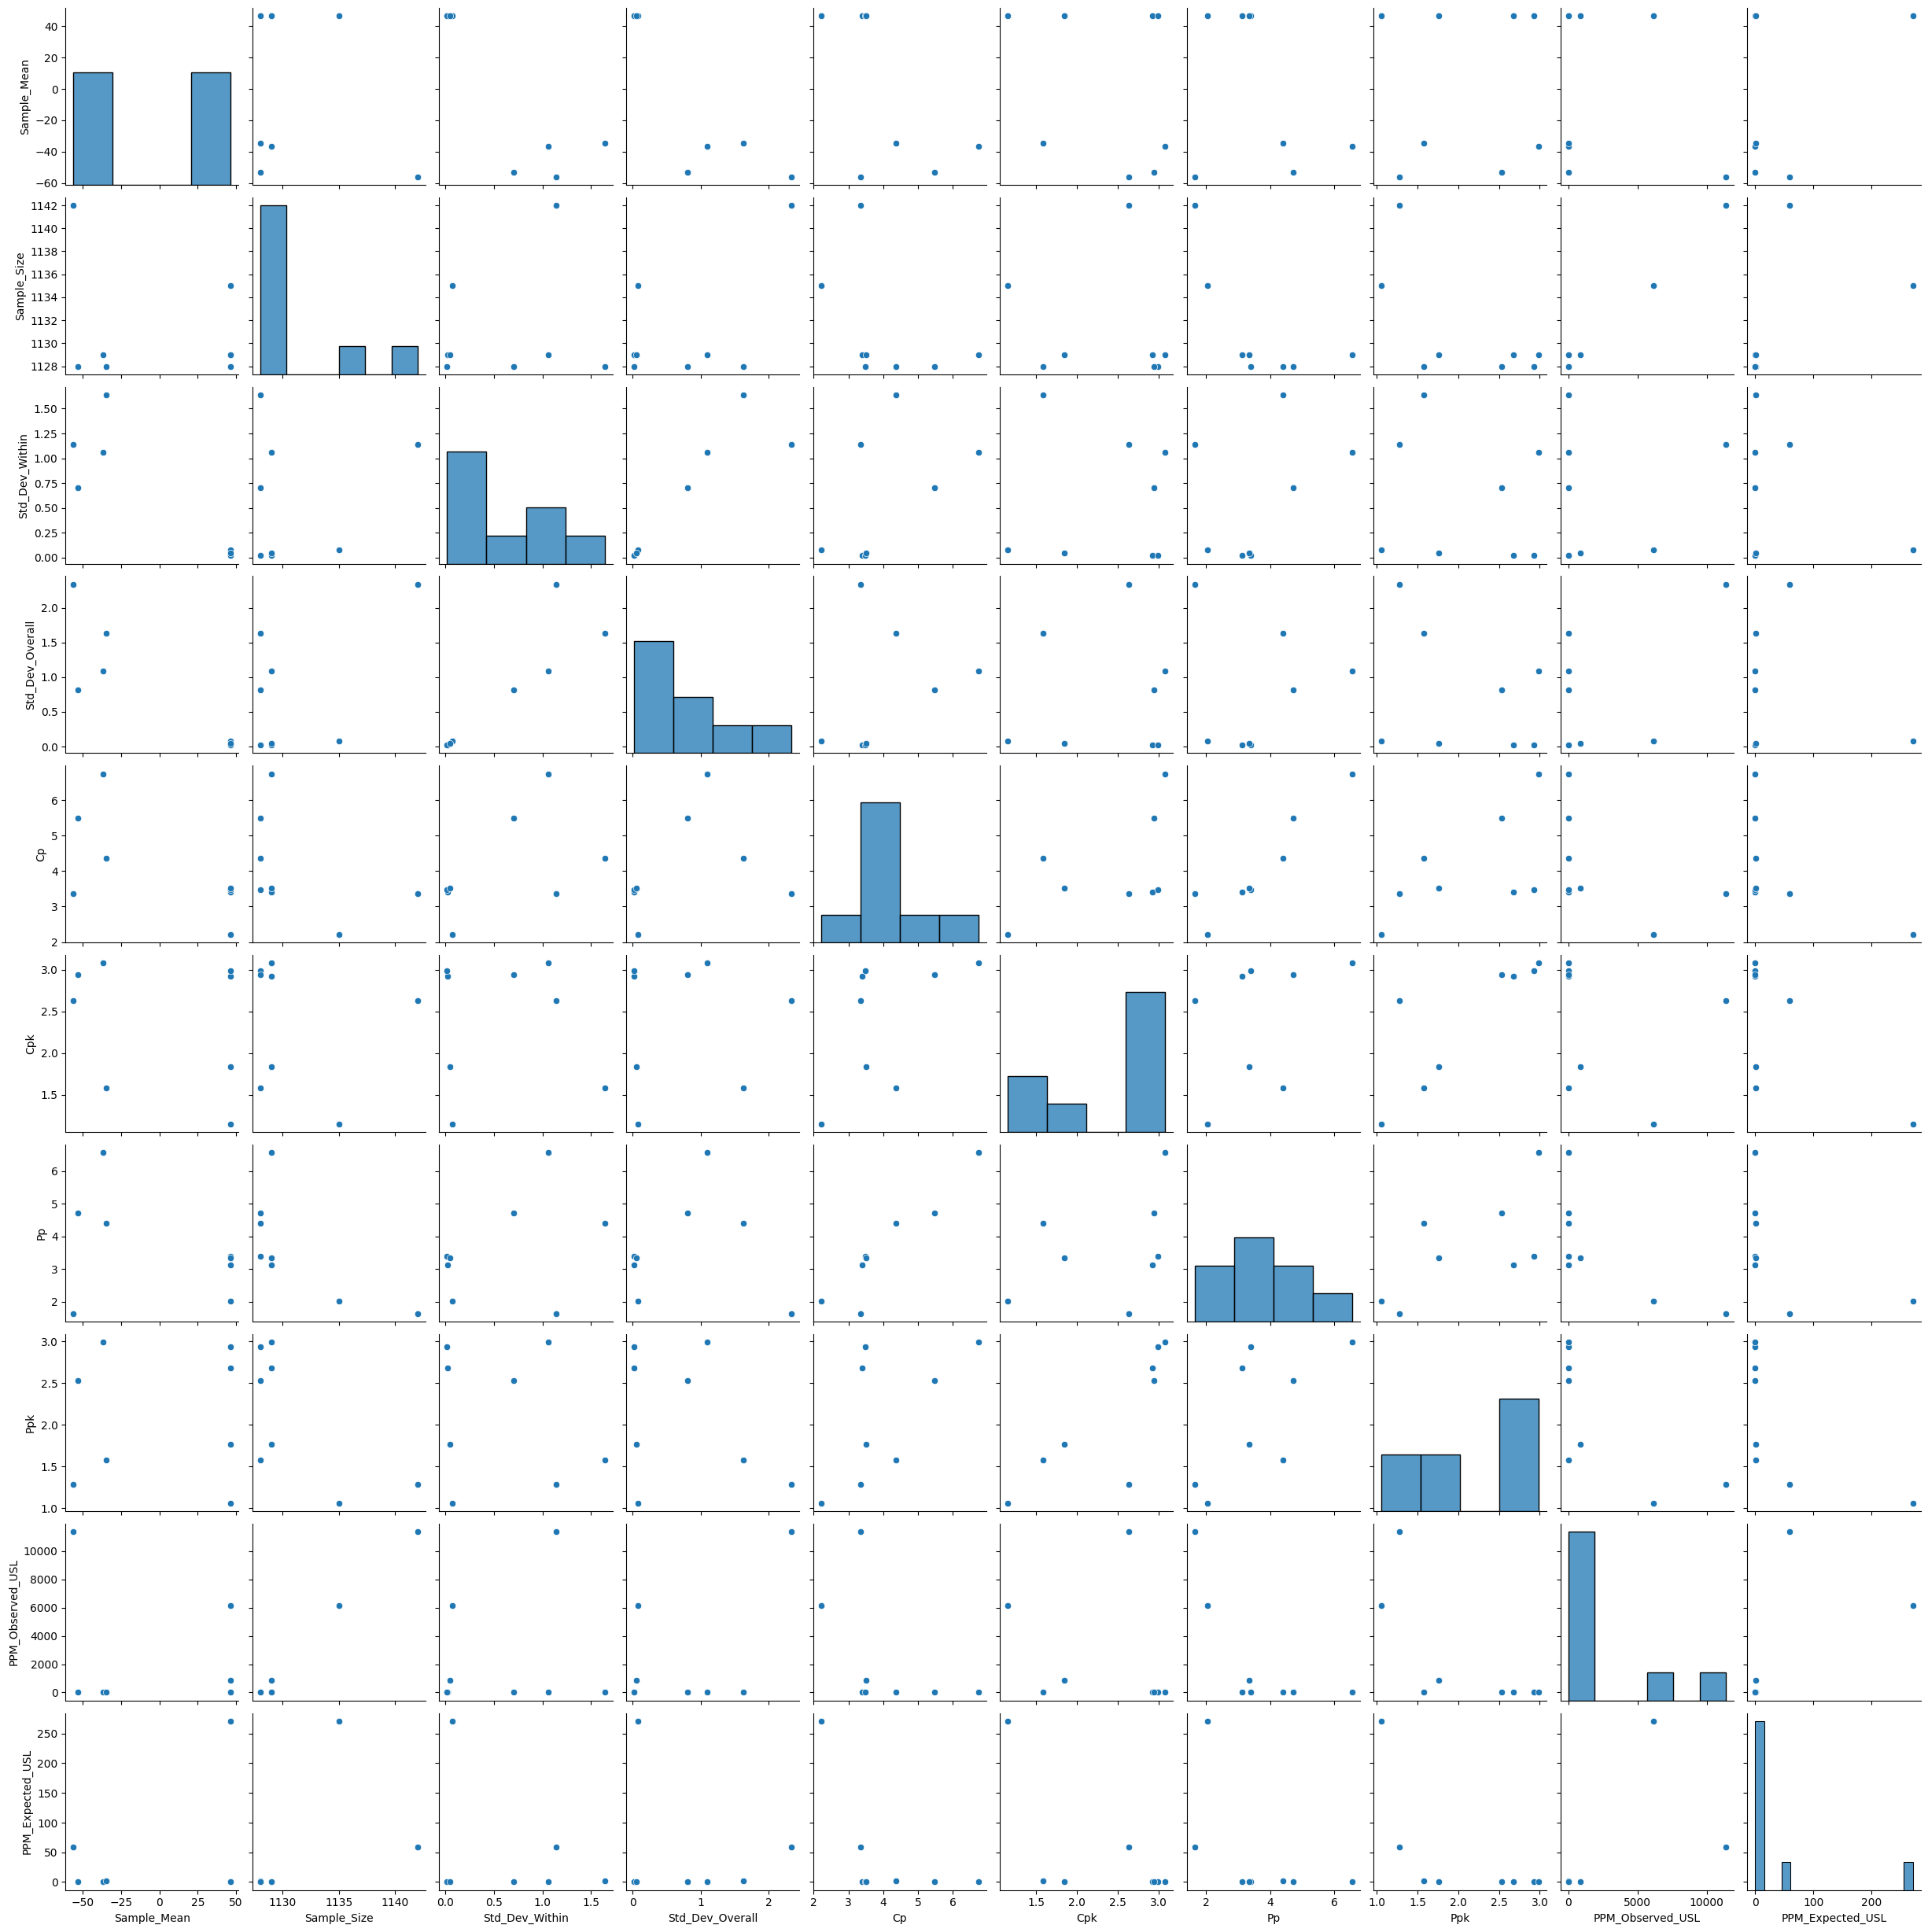

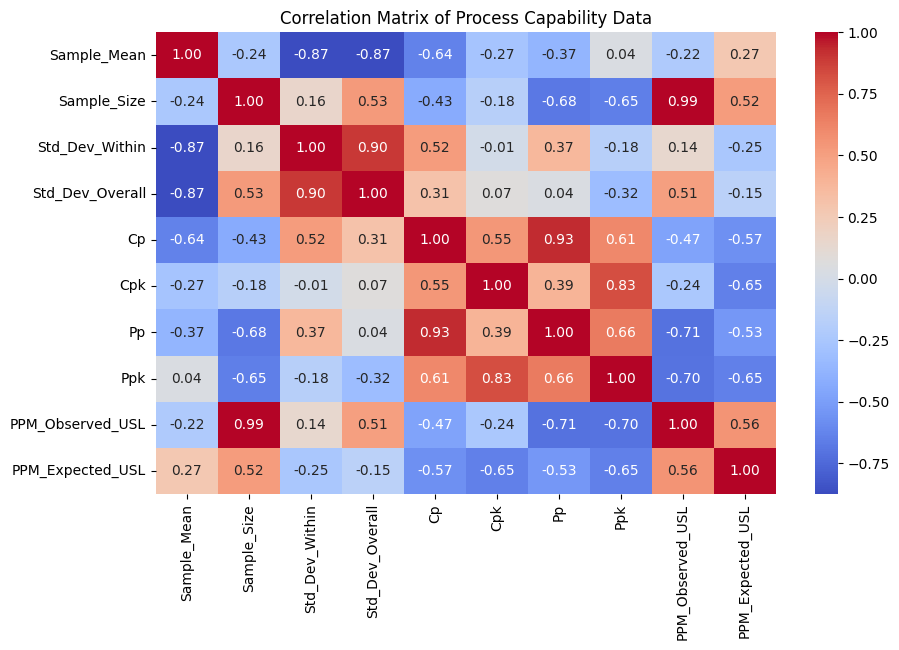

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Remove non-numeric columns before correlation calculation
df_numeric = df.select_dtypes(include=["number"])

# Scatterplot Matrix
sns.pairplot(df_numeric)
plt.show()

# Correlation Matrix Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Process Capability Data")
plt.show()


## **3. Preparing Data for Regression**
We define independent variables (features) and dependent variables (targets), then split the data into training and testing sets.

In [3]:

from sklearn.model_selection import train_test_split

# Selecting Features and Target Variables
X = df[['Sample_Size', 'Std_Dev_Within', 'Std_Dev_Overall', 'Cp', 'Cpk', 'Pp', 'Ppk']]
y = df[['PPM_Observed_USL', 'PPM_Expected_USL']]  # Predicting both observed and expected PPM

# Splitting Data into Training (80%) and Testing (20%) Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((6, 7), (2, 7), (6, 2), (2, 2))

## **4. Training a Linear Regression Model**
We create and train a **Linear Regression** model using the training dataset.

In [5]:

from sklearn.linear_model import LinearRegression

# Create and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Model Coefficients & Intercept
print("Model Coefficients:", model.coef_)
print("Model Intercept:", model.intercept_)


Model Coefficients: [[  738.31539913  -384.46713293  -143.98679678  1015.18733907
   -297.77731923  -720.32523889 -1022.4860083 ]
 [   15.0853401    -56.10896281   -79.25845811    45.91508541
    -76.90047257     7.10336471   -70.88294077]]
Model Intercept: [-831134.72605248  -16792.38827713]


## **5. Model Evaluation**
We evaluate the model's performance using **Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R² Score**.

In [6]:

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predictions on Test Data
y_pred = model.predict(X_test)

# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 406.50621769930564
Mean Squared Error (MSE): 348649.873136933
Root Mean Squared Error (RMSE): 590.465810303131
R-squared (R²): -59662068.26125912


## **6. Residual Analysis**
To ensure the model fits well, we check if residuals follow a normal distribution.

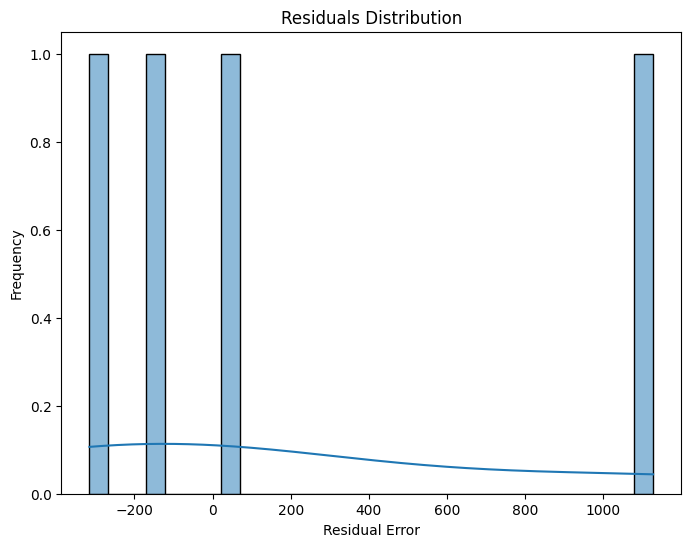

In [7]:

import numpy as np

residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.histplot(np.array(residuals).flatten(), bins=30, kde=True)
plt.title("Residuals Distribution")
plt.xlabel("Residual Error")
plt.ylabel("Frequency")
plt.show()


## **7. Predicting New Data**
Once the model is validated, we use it to predict **PPM defect rates** for new manufacturing processes.

In [8]:

new_data = pd.DataFrame({
    "Sample_Size": [1150],
    "Std_Dev_Within": [0.02],
    "Std_Dev_Overall": [0.03],
    "Cp": [3.5],
    "Cpk": [2.8],
    "Pp": [3.2],
    "Ppk": [2.7]
})

# Predict PPM values for the new dataset
new_predictions = model.predict(new_data)
print("Predicted PPM Values:", new_predictions)


Predicted PPM Values: [[15569.60020317   328.98121063]]


## **Conclusion**
This notebook provides a step-by-step approach to building a linear regression model to predict **PPM defect rates** based on process capability metrics.

### **Key Takeaways:**
- **Feature Importance**: Identified key process parameters influencing defect rates.
- **Model Accuracy**: Evaluated using multiple error metrics.
- **Process Optimization**: Helps reduce defects in manufacturing by predicting defect rates.

### **Next Steps:**
- Improve model by adding more data.
- Experiment with polynomial regression or decision tree models for better accuracy.
- Deploy the model in production for **real-time defect prediction**.